## Movie Recommender System

#### In the chaotic world of LSTMs, LLMs, and other abbreviated models that put all us data scientists in a fear, we often forget the simpler and softer algorithms that still work wonders.

#### A movie recommendation is one of the simplest implementations of machine learning, analysing data and clustering them into similar groups. This code utilises **cosine similarity** to return 5 movies you should watch if you like a movie already.

#### Like me: **I love Schindler's list**. It's dramatic and historical, making me feel everything someone would have gone through during World War II. What should I watch next? My Netflix algorithm (in some alternate universe) has stopped working, and I want to know which movies I would love next.

#### ***This code does that.***

#### So, let's explore the data and find 5 movies I should watch!

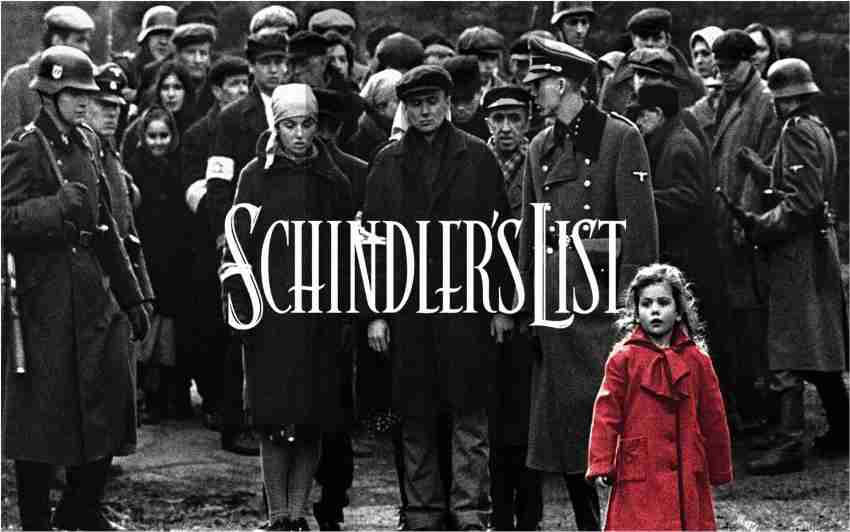



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moives-dataset/genres.csv
/kaggle/input/moives-dataset/MOIVES_DATA.csv


#### Importing datasets and exploring data

In [2]:
movies=pd.read_csv("/kaggle/input/moives-dataset/MOIVES_DATA.csv")
genres=pd.read_csv("/kaggle/input/moives-dataset/genres.csv")

In [3]:
movies

,Unnamed: 0,id,original_title,overview,genre_ids
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]"
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"[18, 80]"
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[18, 80]"
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,"[18, 36, 10752]"
4,4,19404,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...","[35, 18, 10749]"
...,...,...,...,...,...
9002,9002,12142,Alone in the Dark,Edward Carnby is a private investigator specia...,"[28, 14, 27]"
9003,9003,5491,Battlefield Earth,"In the year 3000, man is no match for the Psyc...","[28, 12, 878]"
9004,9004,11059,House of the Dead,"Set on an island off the coast, a techno rave ...","[27, 28, 53]"
9005,9005,14164,Dragonball Evolution,"On his 18th birthday, Goku receives a mystical...","[28, 12, 14, 878, 53]"


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9007 entries, 0 to 9006
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      9007 non-null   int64 
 1   id              9007 non-null   int64 
 2   original_title  9007 non-null   object
 3   overview        9006 non-null   object
 4   genre_ids       9007 non-null   object
dtypes: int64(2), object(3)
memory usage: 352.0+ KB


#### Let us convert the genre ids into array datatype so that we can merge both the datasets into a single dataset easily.

In [5]:
import ast
movies['genre_ids'] = movies['genre_ids'].apply(ast.literal_eval)

In [6]:
genres

,Unnamed: 0,id,name
0,0,28,Action
1,1,12,Adventure
2,2,16,Animation
3,3,35,Comedy
4,4,80,Crime
5,5,99,Documentary
6,6,18,Drama
7,7,10751,Family
8,8,14,Fantasy
9,9,36,History


In [7]:
movies.shape

(9007, 5)

In [8]:
genres.shape

(19, 3)

In [9]:
genres['genre_ids']=genres['id']
genres.drop('id', axis=1)

,Unnamed: 0,name,genre_ids
0,0,Action,28
1,1,Adventure,12
2,2,Animation,16
3,3,Comedy,35
4,4,Crime,80
5,5,Documentary,99
6,6,Drama,18
7,7,Family,10751
8,8,Fantasy,14
9,9,History,36


In [10]:
movies_exploded = movies.explode('genre_ids')
movies_exploded

,Unnamed: 0,id,original_title,overview,genre_ids
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",18
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",80
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,18
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,80
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,18
...,...,...,...,...,...
9006,9006,40016,Birdemic: Shock and Terror,A platoon of eagles and vultures attacks the r...,53
9006,9006,40016,Birdemic: Shock and Terror,A platoon of eagles and vultures attacks the r...,14
9006,9006,40016,Birdemic: Shock and Terror,A platoon of eagles and vultures attacks the r...,10749
9006,9006,40016,Birdemic: Shock and Terror,A platoon of eagles and vultures attacks the r...,27


In [11]:
merged_df = pd.merge(movies_exploded, genres, on='genre_ids')
merged_df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)


,id_x,original_title,overview,genre_ids,id_y,name
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",18,18,Drama
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,18,18,Drama
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,18,18,Drama
3,424,Schindler's List,The true story of how businessman Oskar Schind...,18,18,Drama
4,19404,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",18,18,Drama
...,...,...,...,...,...,...
23521,438970,Sharknado 5: Global Swarming,Fin and his wife April travel around the world...,10770,10770,TV Movie
23522,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,10770,10770,TV Movie
23523,12536,Home Alone 4,Kevin McCallister's parents have split up. Now...,10770,10770,TV Movie
23524,205321,Sharknado,"A freak hurricane hits Los Angeles, causing ma...",10770,10770,TV Movie


#### Processing the datasets to finally obtain a final dataset to begin our work.

In [12]:
grouped_df = merged_df.groupby('original_title').agg({
    'genre_ids': list,
    'name': list
}).reset_index()

final = pd.merge(merged_df[['id_x', 'original_title', 'overview']], grouped_df, on='original_title')
final['genres']=final['name']
final = final[['original_title', 'overview', 'genre_ids', 'genres']]
final = final.drop_duplicates(subset=['original_title'])
final

,original_title,overview,genre_ids,genres
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","[Drama, Crime]"
2,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"[18, 80]","[Drama, Crime]"
4,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[18, 80]","[Drama, Crime]"
6,Schindler's List,The true story of how businessman Oskar Schind...,"[18, 36, 10752]","[Drama, History, War]"
9,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...","[18, 35, 10749]","[Drama, Comedy, Romance]"
...,...,...,...,...
23521,Judge Dredd,"In a dystopian future, Dredd, the most famous ...",[878],[Science Fiction]
23522,Science Fiction Volume One: The Osiris Child,Set in the future in a time of interplanetary ...,[878],[Science Fiction]
23523,Stealth,Deeply ensconced in a top-secret military prog...,[878],[Science Fiction]
23524,IO,As a young scientist searches for a way to sav...,[878],[Science Fiction]


In [13]:
final['genres']=final['genres'].astype(str)
final['keywords'] = final['overview'] + ' ' + final['genres']
final.drop(['genres', 'overview', 'genre_ids'], axis=1, inplace=True)

In [14]:
final

,original_title,keywords
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
2,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
4,The Godfather Part II,In the continuing saga of the Corleone crime f...
6,Schindler's List,The true story of how businessman Oskar Schind...
9,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second..."
...,...,...
23521,Judge Dredd,"In a dystopian future, Dredd, the most famous ..."
23522,Science Fiction Volume One: The Osiris Child,Set in the future in a time of interplanetary ...
23523,Stealth,Deeply ensconced in a top-secret military prog...
23524,IO,As a young scientist searches for a way to sav...


In [15]:
final = final.reset_index(drop=True)
final

,original_title,keywords
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
2,The Godfather Part II,In the continuing saga of the Corleone crime f...
3,Schindler's List,The true story of how businessman Oskar Schind...
4,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second..."
...,...,...
8749,Judge Dredd,"In a dystopian future, Dredd, the most famous ..."
8750,Science Fiction Volume One: The Osiris Child,Set in the future in a time of interplanetary ...
8751,Stealth,Deeply ensconced in a top-secret military prog...
8752,IO,As a young scientist searches for a way to sav...


#### Here, we are beginning text processing to feed into our cosine similarity object.

In [16]:
final['keywords']=final['keywords'].astype(str)
final['keywords']=final['keywords'].apply(lambda x:x.lower())

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')


In [18]:
vectors= cv.fit_transform(final['keywords']).toarray()

In [19]:
vectors.shape #transformed vectors (ie 5000 words for each movie)

(8754, 5000)

In [20]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import nltk
from nltk.stem.porter import *
ps=PorterStemmer()

In [22]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y) #returns string after stemming

In [23]:
final['keywords']= final['keywords'].apply(stem)

In [24]:
final

,original_title,keywords
0,The Godfather,"span the year 1945 to 1955, a chronicl of the ..."
1,The Shawshank Redemption,frame in the 1940 for the doubl murder of hi w...
2,The Godfather Part II,in the continu saga of the corleon crime famil...
3,Schindler's List,the true stori of how businessman oskar schind...
4,दिलवाले दुल्हनिया ले जायेंगे,"raj is a rich, carefree, happy-go-lucki second..."
...,...,...
8749,Judge Dredd,"in a dystopian future, dredd, the most famou j..."
8750,Science Fiction Volume One: The Osiris Child,set in the futur in a time of interplanetari c...
8751,Stealth,deepli ensconc in a top-secret militari progra...
8752,IO,as a young scientist search for a way to save ...


#### The data has been processed well, now let's import the cosine similarity model for our recommender system.

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
similarity = cosine_similarity(vectors) #calculates the distance between each vector with another vector

#### So, how does cosine similarity work? 

Two vectors with direction and magnitude have a relative cosine value depending on the angle between them. If the vectors have the same direction, their angle is 0 degrees, and hence, their cosine value is 1. Conversely, if the vectors have an angle of 90 degrees, their cosine value is 0. Cosine similarity algorithms infers data points as these vectors

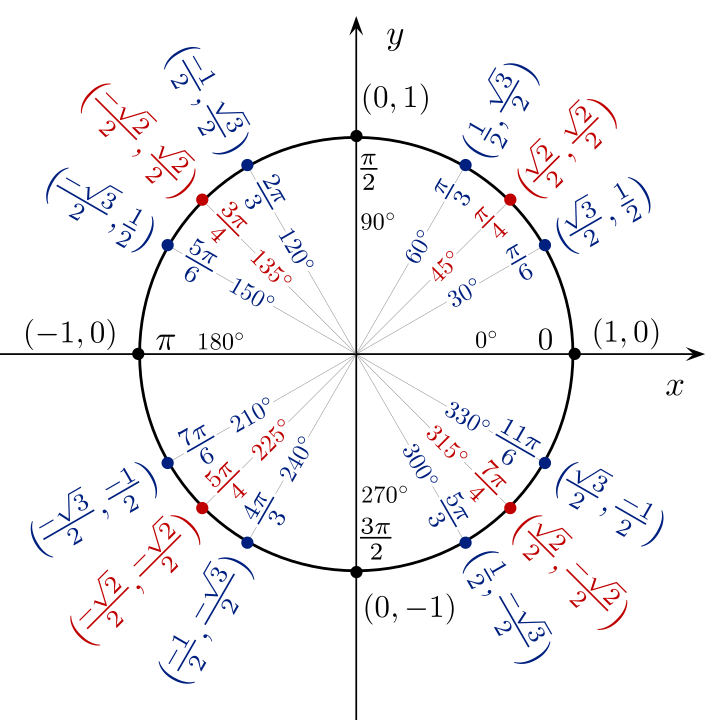

So, similar data points are clustered together by detecting the higher cosine similarity values and conversely as well.

P.S. You can see the cosine value for the data point with itself is 1!


In [27]:
cosine_similarity(vectors)# for all diagonal elements means movie with respect to the same movie thus angle 0 thus cos0=1


array([[1.        , 0.14940358, 0.44262667, ..., 0.        , 0.        ,
        0.        ],
       [0.14940358, 1.        , 0.15430335, ..., 0.        , 0.        ,
        0.        ],
       [0.44262667, 0.15430335, 1.        , ..., 0.        , 0.05455447,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12126781,
        0.        ],
       [0.        , 0.        , 0.05455447, ..., 0.12126781, 1.        ,
        0.09449112],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09449112,
        1.        ]])

In [28]:
list(enumerate(similarity[0]))[0:10]
#creates a list of tuples mentioning distance with respect to index as well, only first 10 displayed here.

[(0, 1.0),
 (1, 0.1494035761667992),
 (2, 0.44262666813799045),
 (3, 0.03877833671647406),
 (4, 0.09258200997725513),
 (5, 0.21971768720102053),
 (6, 0.14638501094227999),
 (7, 0.18257418583505536),
 (8, 0.12143534814378326),
 (9, 0.036037498507822355)]

In [29]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[0:10] 
#sort in reverse order with respect to 1st index, only first 10 displayed here.

[(0, 1.0),
 (2, 0.44262666813799045),
 (3406, 0.39036002917941337),
 (106, 0.37186787208054733),
 (1451, 0.35675303400633784),
 (3838, 0.3450327796711772),
 (3543, 0.34016802570830457),
 (2588, 0.3401680257083045),
 (2509, 0.3380617018914066),
 (2614, 0.3380617018914066)]

In [30]:
def recommend(movie):
  movie_index=final[final['original_title'] ==movie].index[0]
  distances=similarity[movie_index] #gives a list of all distances for a movie
  movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6] #since, we want the top 5 recommendations

  #movies_list will return tuple with index of movie and the corresponding distance
  for i in movies_list:
    print(final.iloc[i[0]].original_title)
    #print(i[0])


In [31]:
recommend("Schindler's List")

Resistance
Die Fälscher
A Hidden Life
The Railway Man
Red Tails


#### Guess these are the movies I am adding to my watchlist!

psssss... copy and edit this notebook and put in the movie you already like to construct your watchlist!